In [1]:
import sys
sys.path.append('/home/jp/Documents/GitProjects/faas-sim')
from typing import List

import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import numpy as np
import pickle
import datetime as dt
import matplotlib.dates as md
from matplotlib import ticker
import re

from ext.jjnp21.automator.experiment import Result
from ext.jjnp21.automator.analyzer import BasicResultAnalyzer



def load_results(path) -> List[Result]:
    with open(path, 'rb') as f:
        results = pickle.load(f)
        return results

['/home/jp/Documents/GitProjects/faas-sim/ext/jjnp21/experiments/osmotic',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/home/jp/Documents/GitProjects/old-faasim-for-eval/faas-sim/venv/lib/python3.7/site-packages',
 '/home/jp/Documents/GitProjects/old-faasim-for-eval/faas-sim/venv/lib/python3.7/site-packages/IPython/extensions',
 '/home/jp/.ipython']

In [2]:
# importing of raw data
path = '/home/jp/Documents/tmp/'
dumps = [
#     ('osmotic_basic_fixed_fx_scaling.dump', 'fixed_scaling'),
    ('osmotic_basic_openfaas_scaling.dump', 'openfaas_scaling_basic'),
#     ('test.dump', 'test')
]
results = {}
for filename, key in dumps:
    results[key] = load_results(f'{path}/{filename}')

FileNotFoundError: [Errno 2] No such file or directory: '/home/jp/Documents/tmp//osmotic_basic_openfaas_scaling.dump'

In [15]:
r = results['openfaas_scaling_basic'][]

In [25]:
def get_friendly_label(text):
    if re.match(re.compile('.*osmotic.*'), text):
        return 'Osmotic'
    elif re.match(re.compile('.*lrt.*'), text):
        return 'Least Response Time'
    else:
        return 'Round Robin'

In [5]:
fx_names = ['resnet50-inference', 'mobilenet-inference', 'speech-inference']

def sum_fxs(df):
    ndf = df[df['function_name'].isin(fx_names)]
    return ndf.groupby('time').sum()

def paint_replica_scale(ax, rs, title):
    timebase = dt.datetime(1970,1,1)
    
    xfmt = md.DateFormatter('%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    t_index = pd.DatetimeIndex(pd.date_range(start=dt.datetime(1970,1,1,0,0,0), end=dt.datetime(1970,1,1,0,5,0), freq="1s"))
    
#     ax2 = ax.twinx()
    for r in rs:
        data = sum_fxs(r.scale)
#         data.plot()
        delta = data.iloc[0].name - timebase
        ax.plot(data.shift(freq=-delta).resample('1s').pad().reindex(t_index).fillna(method="pad"), label=get_friendly_label(r.experiment.name))
#         ax2.plot(r.invocations.shift(freq=-delta)['t_exec'].resample('10s').mean())
    ax.set_xlabel('time')
    ax.set_ylabel('total function replicas')
    ax.legend()
    ax.set_title(title)

In [67]:
def filter_by_experiment_name_regex(exps, rgx):
    result = []
    for exp in exps:
        if re.match(re.compile(rgx), exp.experiment.name):
            result.append(exp)
    return sorted(result, key=lambda r: r.experiment.name)

In [125]:
len(filter_by_experiment_name_regex(results['openfaas_scaling_basic'], '.*osmotic.*'))

9

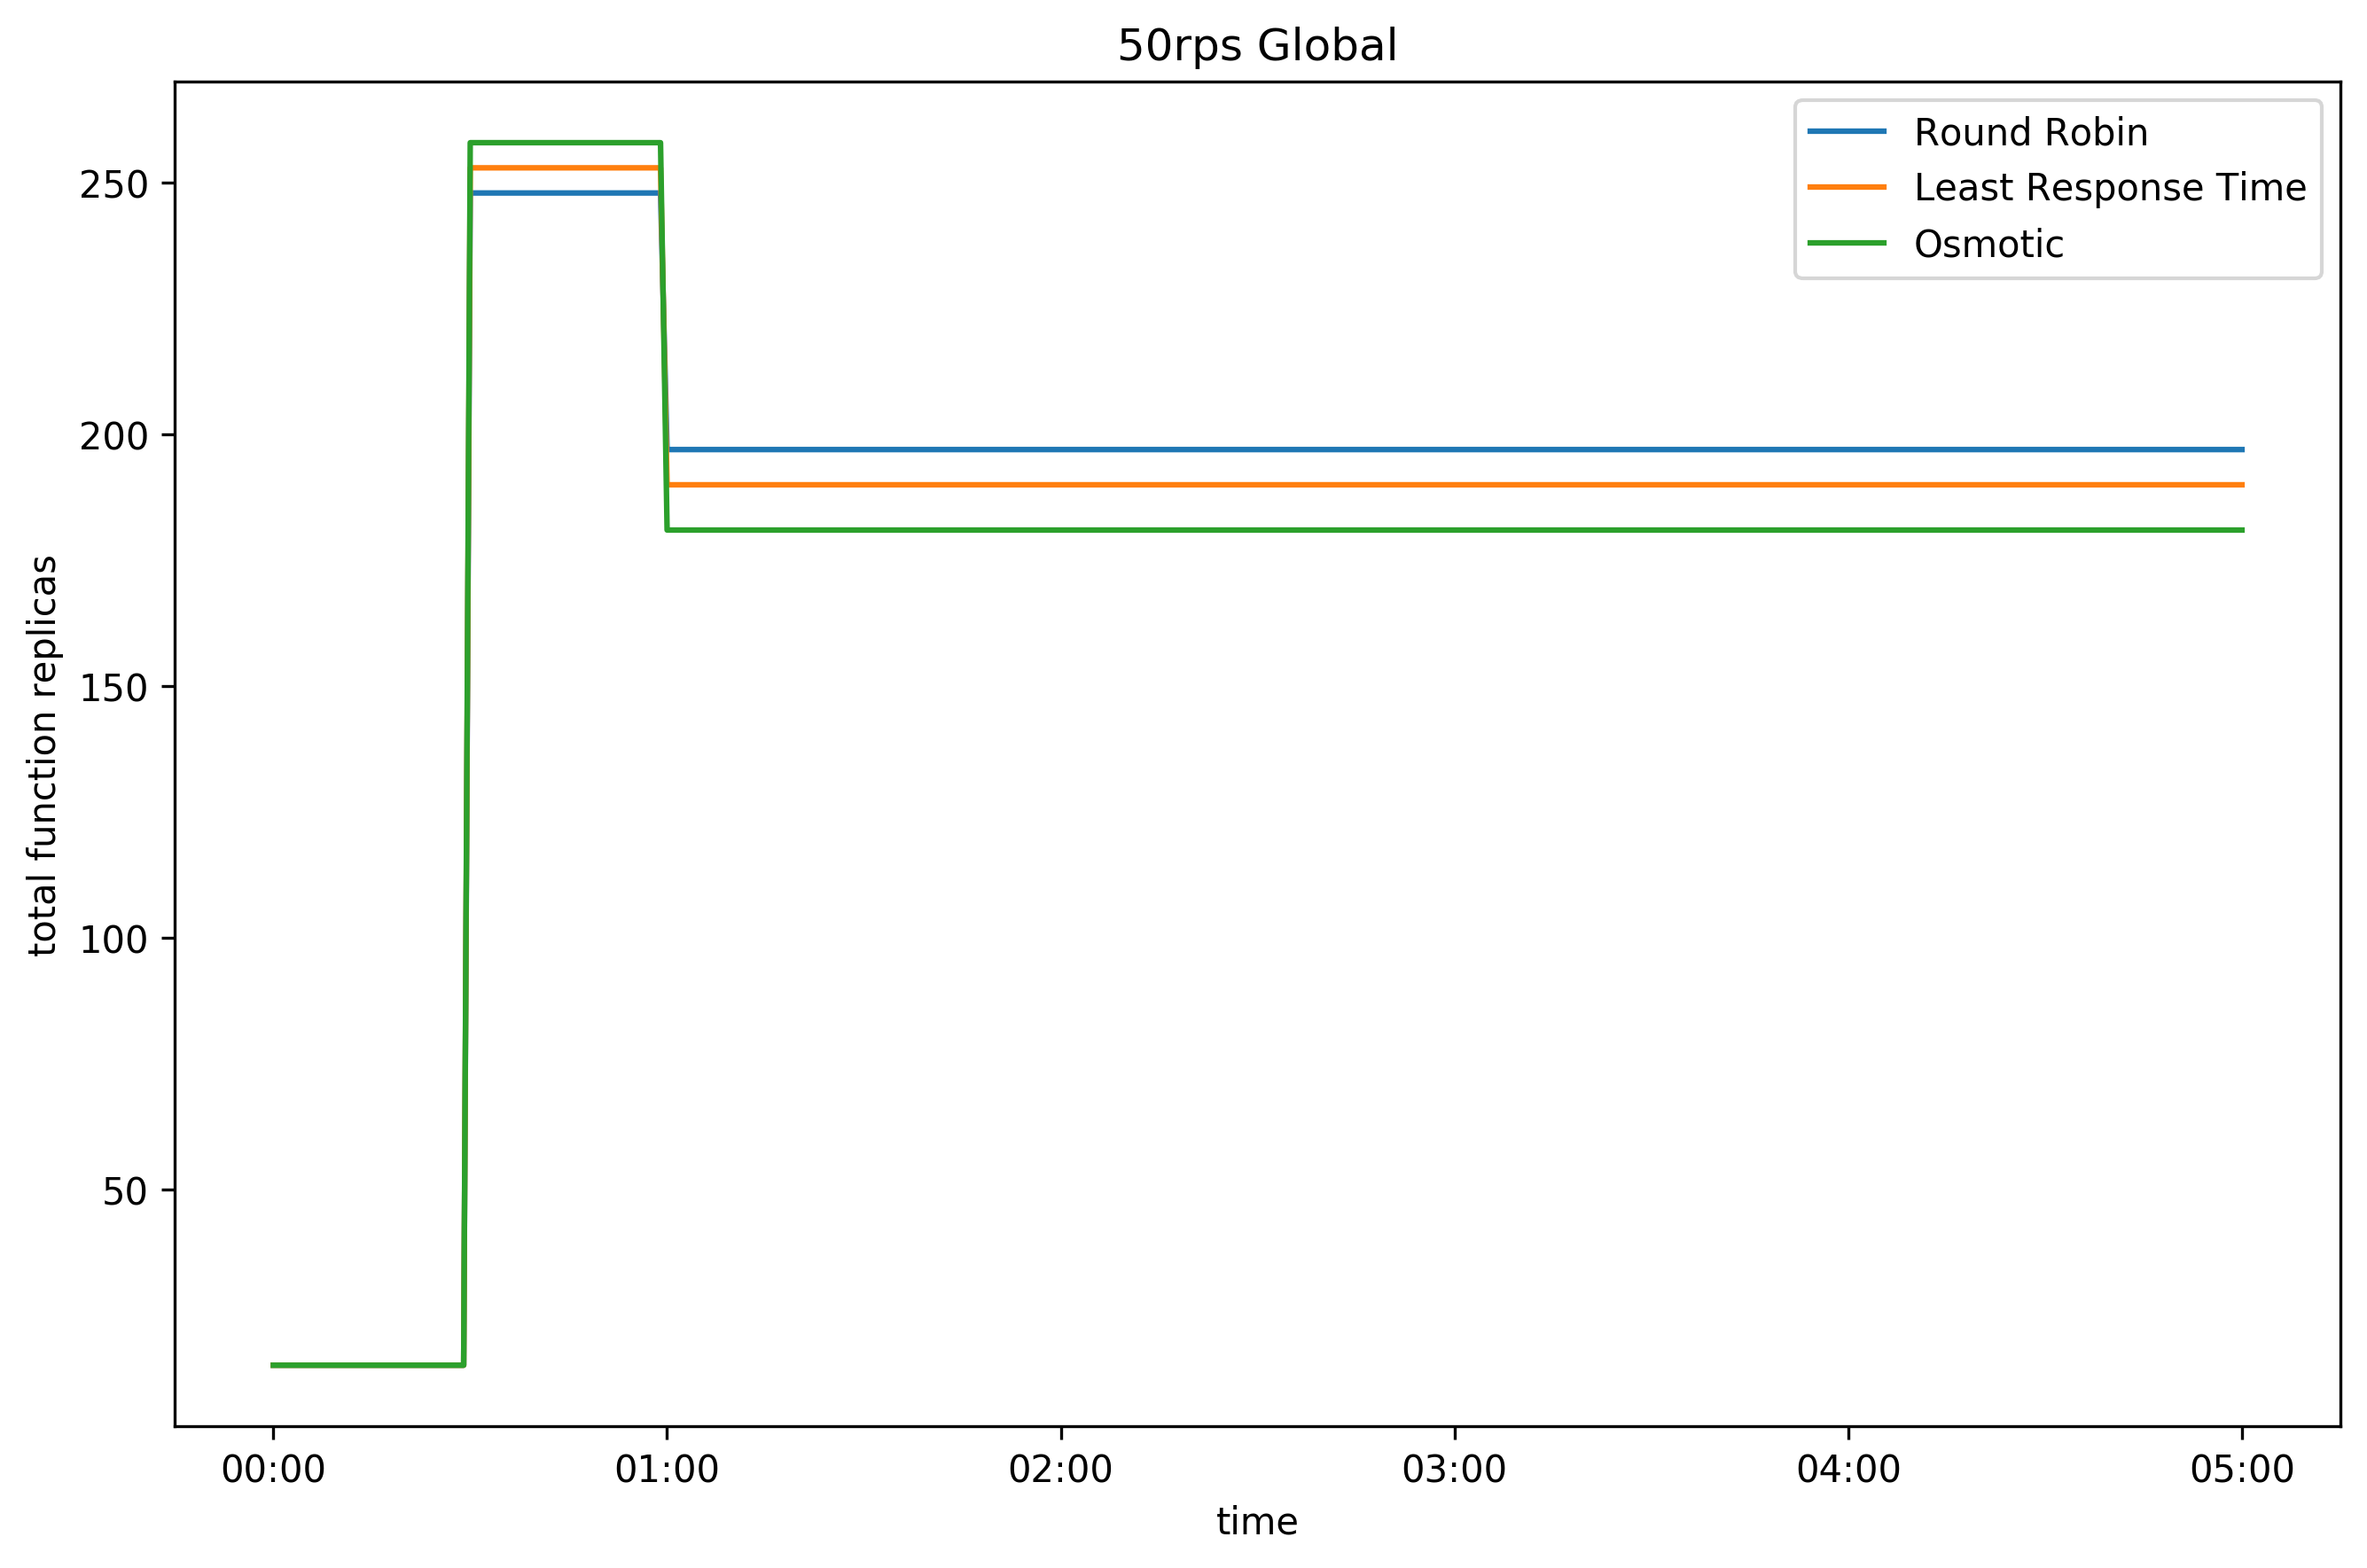

In [26]:
r = results['openfaas_scaling_basic'][16]
# sum_fxs(r.scale).resample('1s').pad().plot()
# sum_fxs(r.scale).plot()
fig, axs = plt.subplots(1, 1, figsize=(9,6), dpi=300)
paint_replica_scale(axs, filter_by_experiment_name_regex(results['openfaas_scaling_basic'], '.*50rps.*global.*'), '50rps Global')
fig.tight_layout()
plt.show()

In [33]:
c = len(results['openfaas_scaling_basic'][0].invocations)
results['openfaas_scaling_basic'][0].invocations[int(c/2):]

,t_wait,t_exec,t_start,memory,tx_time_cl_lb,tx_time_lb_fx,replica_city,client_city,client_node,lb_city,lb_node,function_name,function_image,node,replica_id
time,,,,,,,,,,,,,,,
2022-02-02 22:37:31.368131,0.0,0.532636,1017.60,104857600,0.102061,0.008031,newyork,newyork,rpi3_63,newyork,nano_8,speech-inference,faas-workloads/speech-inference-tflite,rpi3_0,140328516918480
2022-02-02 22:37:31.371527,0.0,0.136032,1018.00,104857600,0.095817,0.008259,newyork,newyork,rpi3_43,newyork,rockpi_2,mobilenet-inference,faas-workloads/mobilenet-inference-tflite,rpi4_7,140328509207376
2022-02-02 22:37:31.380881,0.0,0.105386,1018.04,104857600,0.088221,0.010182,newyork,newyork,rpi3_27,newyork,coral_1,mobilenet-inference,faas-workloads/mobilenet-inference-tflite,nuc_14,140328508867344
2022-02-02 22:37:31.410524,0.0,0.255029,1017.92,104857600,0.098336,0.088191,newyork,newyork,rpi3_15,newyork,rockpi_2,speech-inference,faas-workloads/speech-inference-tflite,nx_4,140328509032976
2022-02-02 22:37:31.415435,0.0,0.099940,1018.08,104857600,0.082892,0.009703,newyork,newyork,rpi3_49,newyork,coral_1,mobilenet-inference,faas-workloads/mobilenet-inference-tflite,xeoncpu_16,140328508867728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 22:54:17.195196,0.0,0.119701,2023.84,104857600,0.083337,0.009774,newyork,newyork,rpi3_9,newyork,nano_8,speech-inference,faas-workloads/speech-inference-tflite,nuc_10,140328517952528
2022-02-02 22:54:17.207429,0.0,0.091934,2023.88,419430400,0.079400,0.009576,newyork,newyork,rpi3_40,newyork,rockpi_2,resnet50-inference,faas-workloads/resnet-inference-gpu,xeongpu_6,140328521096016
2022-02-02 22:54:17.213987,0.0,0.218492,2023.76,104857600,0.081331,0.126082,newyork,newyork,rpi3_20,newyork,xeoncpu_12,mobilenet-inference,faas-workloads/mobilenet-inference-tflite,nano_12,140328508755216


In [51]:
def cut_to_latter_half(result):
    count = len(result.invocations)
    result.invocations = result.invocations[int(count/2):]
    return result

halved_results = list(map(lambda r: cut_to_latter_half(r), results['openfaas_scaling_basic']))
analyzer = BasicResultAnalyzer(halved_results)
analysis_df = analyzer.basic_kpis()
lb_placement = analyzer.lb_placement()

In [52]:
analysis_df

,name,E2E mean,E2E q50,E2E q75,E2E q90,E2E q99,FET mean,FET q50,FET q75,FET q90,...,tx_time_lb_fx mean,tx_time_lb_fx q50,tx_time_lb_fx q75,tx_time_lb_fx q90,tx_time_lb_fx q99,cl_fx_cross_city,cl_lb_fx_cross_city,nodes_by_type,total_rq_by_type,avg_rq_by_type
0,25rps_2000s_city_rr_baseline,0.1687,0.1362,0.2041,0.2757,0.5281,0.0451,0.0172,0.0322,0.0973,...,0.0314,0.0098,0.0733,0.0979,0.1313,0.000000,0.000000,"{'rpi3': 5, 'rpi4': 5, 'tx2': 9, 'nuc': 14, 'r...","{'rpi3': 3664, 'rpi4': 2993, 'tx2': 6214, 'nuc...","{'rpi3': 732.8, 'rpi4': 598.6, 'tx2': 690.4444..."
1,25rps_2000s_city_lrt_baseline,0.1217,0.1214,0.1363,0.1572,0.2362,0.0202,0.0131,0.0267,0.0315,...,0.0094,0.0087,0.0098,0.0102,0.0123,0.000000,0.000000,"{'rpi3': 1, 'rpi4': 8, 'tx2': 9, 'nuc': 13, 'r...","{'rpi3': 256, 'rpi4': 2412, 'tx2': 7232, 'nuc'...","{'rpi3': 256.0, 'rpi4': 301.5, 'tx2': 803.5555..."
2,25rps_2000s_city_osmotic,0.1171,0.1190,0.1337,0.1492,0.2059,0.0174,0.0097,0.0266,0.0271,...,0.0126,0.0097,0.0100,0.0103,0.1063,0.000000,0.000000,"{'rpi3': 4, 'rpi4': 6, 'tx2': 9, 'nuc': 14, 'r...","{'rpi3': 102, 'rpi4': 565, 'tx2': 8869, 'nuc':...","{'rpi3': 25.5, 'rpi4': 94.16666666666667, 'tx2..."
3,50rps_2000s_city_rr_baseline,0.1626,0.1410,0.2051,0.2482,0.3699,0.0366,0.0177,0.0320,0.0966,...,0.0334,0.0099,0.0791,0.1005,0.1377,0.000000,0.000000,"{'rpi3': 4, 'rpi4': 8, 'tx2': 9, 'nuc': 14, 'r...","{'rpi3': 5718, 'rpi4': 9142, 'tx2': 16583, 'nu...","{'rpi3': 1429.5, 'rpi4': 1142.75, 'tx2': 1842...."
4,50rps_2000s_city_lrt_baseline,0.1270,0.1242,0.1415,0.1775,0.2721,0.0226,0.0139,0.0268,0.0349,...,0.0145,0.0097,0.0102,0.0117,0.1111,0.000000,0.000000,"{'rpi3': 4, 'rpi4': 7, 'tx2': 9, 'nuc': 13, 'r...","{'rpi3': 1820, 'rpi4': 5452, 'tx2': 13484, 'nu...","{'rpi3': 455.0, 'rpi4': 778.8571428571429, 'tx..."
5,50rps_2000s_city_osmotic,0.1230,0.1230,0.1392,0.1642,0.2175,0.0221,0.0166,0.0268,0.0360,...,0.0125,0.0097,0.0100,0.0105,0.1050,0.000000,0.000000,"{'rpi3': 3, 'rpi4': 6, 'tx2': 9, 'nuc': 14, 'r...","{'rpi3': 1264, 'rpi4': 6061, 'tx2': 13738, 'nu...","{'rpi3': 421.3333333333333, 'rpi4': 1010.16666..."
6,75rps_2000s_city_lrt_baseline,0.1275,0.1238,0.1408,0.1757,0.2825,0.0210,0.0121,0.0267,0.0317,...,0.0130,0.0095,0.0103,0.0119,0.1066,0.000000,0.000000,"{'rpi3': 3, 'rpi4': 7, 'tx2': 9, 'nuc': 14, 'r...","{'rpi3': 1060, 'rpi4': 9438, 'tx2': 13989, 'nu...","{'rpi3': 353.3333333333333, 'rpi4': 1348.28571..."
7,75rps_2000s_city_osmotic,0.1224,0.1229,0.1390,0.1620,0.2174,0.0206,0.0137,0.0267,0.0316,...,0.0128,0.0097,0.0101,0.0108,0.1057,0.000000,0.000000,"{'rpi3': 1, 'rpi4': 8, 'tx2': 9, 'nuc': 15, 'r...","{'rpi3': 349, 'rpi4': 6934, 'tx2': 20282, 'nuc...","{'rpi3': 349.0, 'rpi4': 866.75, 'tx2': 2253.55..."
8,75rps_2000s_city_rr_baseline,0.1687,0.1401,0.2105,0.2751,0.5203,0.0409,0.0173,0.0317,0.0975,...,0.0349,0.0102,0.0813,0.1019,0.1465,0.000000,0.000000,"{'rpi3': 4, 'rpi4': 7, 'tx2': 9, 'nuc': 13, 'r...","{'rpi3': 9428, 'rpi4': 11997, 'tx2': 21437, 'n...","{'rpi3': 2357.0, 'rpi4': 1713.857142857143, 't..."
9,25rps_2000s_nation_osmotic,0.2243,0.2085,0.2940,0.3862,0.5466,0.0277,0.0159,0.0268,0.0937,...,0.0629,0.0105,0.1031,0.1751,0.3152,0.494545,0.325349,"{'rpi3': 5, 'rpi4': 6, 'tx2': 23, 'nuc': 8, 'r...","{'rpi3': 300, 'rpi4': 1899, 'tx2': 13304, 'nuc...","{'rpi3': 60.0, 'rpi4': 316.5, 'tx2': 578.43478..."


In [40]:
def kpis_by_expname(expname):
    return analysis_df[analysis_df['name'] == expname]

In [56]:
results['openfaas_scaling_basic'][0].lb_replica_count['running_lb_replicas'].iloc[-1].astype(int)

6

In [72]:
def get_loc_type_string(text):
    if 'global' in text:
        return 'Global'
    elif 'nation' in text:
        return 'Nation'
    else:
        return 'City'
    
def get_lb_type_string(text):
    if 'osmotic' in text:
        return 'Osmotic'
    elif 'lrt' in text:
        return 'LRT'
    else:
        return 'RR'

def build_experiment_name(text):
    return f'{text[:5]} {get_loc_type_string(text)} {get_lb_type_string(text)}'

def build_result_table(results, patterns):
    rows = []s
    for p in patterns:
        for r in filter_by_experiment_name_regex(results, p):
            row = {}
            row['Experiment Name'] = build_experiment_name(r.experiment.name)
            row['LB replicas'] = r.lb_replica_count['running_lb_replicas'].iloc[-1].astype(int)
            row['Converged Total Function Replicas'] = sum_fxs(r.scale)['value'].iloc[-1]
            row['Cross City Request Share'] = f"{round(kpis_by_expname(r.experiment.name)['cl_lb_fx_cross_city'].iloc[0].astype(float) * 100, 1)}%"
            row['Mean TRT'] = f"{int(kpis_by_expname(r.experiment.name)['E2E mean'].iloc[0].astype(float)*1000)}ms"
            row['Median TRT'] = f"{int(kpis_by_expname(r.experiment.name)['E2E q50'].iloc[0].astype(float)*1000)}ms"
            row['Q90 TRT'] = f"{int(kpis_by_expname(r.experiment.name)['E2E q90'].iloc[0].astype(float)*1000)}ms"
            rows.append(row)
    return pd.DataFrame(rows)

def build_pattern_list():
    patterns = []
    rpss = ['25rps', '50rps', '75rps']
    locs = ['city', 'nation', 'global']
    for rps in rpss:
        for loc in locs:
            patterns.append(f'.*{rps}.*{loc}.*')
    return patterns

# build_result_table(results['openfaas_scaling_basic'], ['.*25rps.*global.*'])
results_table = build_result_table(results['openfaas_scaling_basic'], build_pattern_list())
results_table.to_csv('/home/jp/Documents/Thesis/experiments/7_osmotic_base/table.csv')